This program implements an SVM classification method on the ALFA's Compass dataset to develop a Fault Detector and design a sliding window to improve the detector's output stability.

In [1]:
import pandas as pd                                   
from sklearn import preprocessing

compass = pd.read_excel('Compass_dataset.xlsx')       # Importing dataset.
compass



,%time,field_data,FAULT STATUS
0,1536689966610099968,275.84,0
1,1536689966835219968,276.42,0
2,1536689967072790016,276.76,0
3,1536689967344770048,278.49,0
4,1536689967595470080,280.98,0
...,...,...,...
855,1536690511732859904,255.25,1
856,1536690511955790080,256.99,1
857,1536690512234490112,258.68,1
858,1536690512496420096,260.61,1


In [2]:
compass.field_data.describe()                    

count    860.000000
mean     165.203605
std      100.377663
min        0.090000
25%       88.637500
50%      166.955000
75%      263.987500
max      359.860000
Name: field_data, dtype: float64

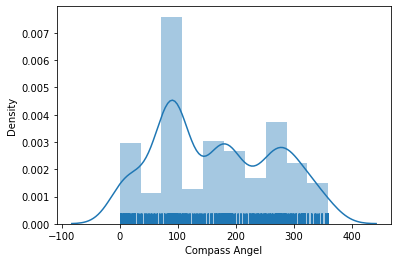

In [3]:
import seaborn as sns                    # Data Description.
ax = sns.distplot(compass.field_data, rug=True)
ax.set(xlabel='Compass Angel', ylabel='Density')
ax.figure.savefig("output.png")

In [4]:
minmax_scale = preprocessing.MinMaxScaler().fit(compass)    # Implementing min-max scaling for preprocessing.
compass_minmax = minmax_scale.transform(compass)
compass_minmax

array([[0.00000000e+00, 7.66461906e-01, 0.00000000e+00],
       [4.12209891e-04, 7.68074047e-01, 0.00000000e+00],
       [8.47216696e-04, 7.69019096e-01, 0.00000000e+00],
       ...,
       [9.99074799e-01, 7.18764766e-01, 1.00000000e+00],
       [9.99554410e-01, 7.24129305e-01, 1.00000000e+00],
       [1.00000000e+00, 7.31995442e-01, 1.00000000e+00]])

In [5]:
X = compass_minmax[:,0:2]

Y = compass_minmax[:,2]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [8]:
 # Separating Train and Test Data.
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.3, random_state=0)
     

In [10]:
q1 = X_valid[:,0].mean()
qq1 = X_valid[:,0].std()
q1

0.6479526014435429

In [11]:
q2 = X_valid[:,1].mean()
qq2= X_valid[:,1].std()
q2

0.4783472774272451

In [12]:
import numpy as np                       # Adding random noise to data.

r1 =0.1*np.random.normal(q1,qq1, X_valid[:,0].shape)
r2 =0.1* np.random.normal(q2,qq2, X_valid[:,1].shape)
f = [r1,r2]
random_noise = np.transpose(f)
random_noise

array([[ 8.89580463e-02,  9.73339016e-02],
       [ 6.54447673e-02,  5.73659772e-02],
       [ 2.64900527e-02,  3.63083230e-02],
       [ 6.70917290e-02,  2.69173050e-03],
       [ 6.66279633e-02,  7.07796103e-02],
       [ 4.78988683e-02,  6.54111950e-02],
       [ 2.36215969e-02,  1.28974756e-02],
       [ 1.22954942e-01,  7.55085933e-02],
       [ 4.06519017e-02,  1.01640921e-01],
       [ 1.75022868e-02,  3.22026481e-02],
       [ 1.16737778e-01,  3.53444452e-02],
       [ 8.42073010e-02,  7.70395382e-02],
       [ 5.65048050e-02,  9.20887031e-02],
       [ 7.71160376e-02,  4.11069851e-02],
       [ 1.23549264e-02,  2.47392197e-02],
       [ 1.89588513e-02,  8.52667525e-02],
       [ 6.37001801e-03,  3.15695666e-02],
       [ 7.18913400e-02,  8.49240853e-02],
       [ 1.26816276e-01,  8.39894108e-02],
       [-1.08609914e-02,  7.54937187e-02],
       [ 6.15197161e-02,  8.05867422e-02],
       [ 9.60995954e-02,  7.52714108e-02],
       [ 5.72114635e-02,  4.86140689e-02],
       [ 7.

In [13]:
X_test = X_valid + 0.1*random_noise
X_test

array([[0.56629389, 0.84615666],
       [0.59052923, 0.26812646],
       [0.61670277, 0.37289453],
       [0.61491343, 0.2504012 ],
       [0.73662559, 0.25190104],
       [0.73159642, 0.2488904 ],
       [0.94794404, 0.25292274],
       [0.73868652, 0.25217937],
       [0.63167682, 0.50028278],
       [0.02845737, 0.54270382],
       [0.64330758, 0.50716176],
       [0.05322513, 0.19618548],
       [0.72176578, 0.25567189],
       [0.67743969, 0.77012788],
       [0.70803143, 0.26272353],
       [0.67444676, 0.81587581],
       [0.72217277, 0.24811902],
       [0.58757688, 0.13312759],
       [0.91637184, 0.84899154],
       [0.91792563, 1.00085065],
       [0.6628958 , 0.77032345],
       [0.05967964, 0.3602247 ],
       [1.00572115, 0.73685685],
       [0.71672018, 0.26539309],
       [0.03364518, 0.48317815],
       [0.01937439, 0.23446719],
       [1.00535572, 0.71527158],
       [0.68811841, 0.0502815 ],
       [0.01019038, 0.83732154],
       [0.91648258, 0.05786023],
       [0.

In [14]:
#clf = svm.SVC(kernel='linear')
clf = svm.SVC(kernel='rbf')             # Implementing the SVM Classiffier.

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.8992248062015504


In [15]:
compass_minmax[:,0].mean()  

0.6414703255459709

In [16]:
compass_minmax[:,1].mean()

0.4589421148265914

In [17]:
compass_minmax[:,2].mean()

0.7453488372093023

In [18]:
compass_minmax[:,0].std()

0.29950269937840257

In [19]:
compass_minmax[:,1].std()

0.2788428343639391

In [20]:
from sklearn.metrics import confusion_matrix     # Collecting the confusion matrix.
cm = confusion_matrix(y_valid,y_pred)
cm

array([[ 39,  26],
       [  0, 193]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report  # Collecting the Classification Report.
mn = classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n
         0.0       1.00      0.60      0.75        65\n 
         1.0       0.88      1.00      0.94       193\n\n 
    accuracy                           0.90       258\n 
   macro avg       0.94      0.80      0.84       258\n
weighted avg       0.91      0.90      0.89       258\n'


In [50]:
import pandas as pd
datas = {'Precision':[1.00,0.88,0.94,0.91],'Recall':[0.60,1.00,0.80,0.90],
         'F1-Score':[0.75,0.94,0.84,0.89]}
Indexes=['0','1','Macro-Avg','Weighted-Avg']
rt = pd.DataFrame(datas, index=Indexes)
rt

,Precision,Recall,F1-Score
0,1.00,0.6,0.75
1,0.88,1.0,0.94
Macro-Avg,0.94,0.8,0.84
Weighted-Avg,0.91,0.9,0.89


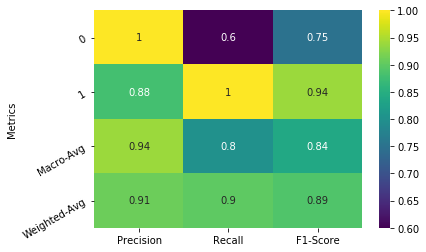

In [63]:
p1=sns.heatmap(rt, annot=True,cmap='viridis')      # Plotting the Classification Report.
p1.set_yticklabels(p1.get_yticklabels(),rotation = 30)
p1.set( ylabel='Metrics')

p1.figure.savefig("Classification_Report_Compass_Dataset.png")

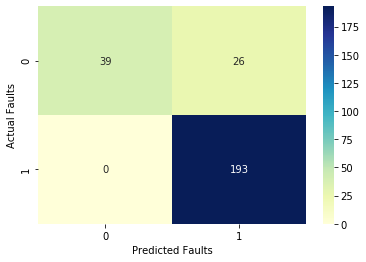

In [64]:
import seaborn as sns                          # Plotting the Confusion Matrix.
bx = sns.heatmap(cm, annot=True,fmt="d", cmap="YlGnBu")
bx.set(xlabel='Predicted Faults', ylabel='Actual Faults')
bx.figure.savefig("Confusion_Matrix_Compass_Dataset.png")

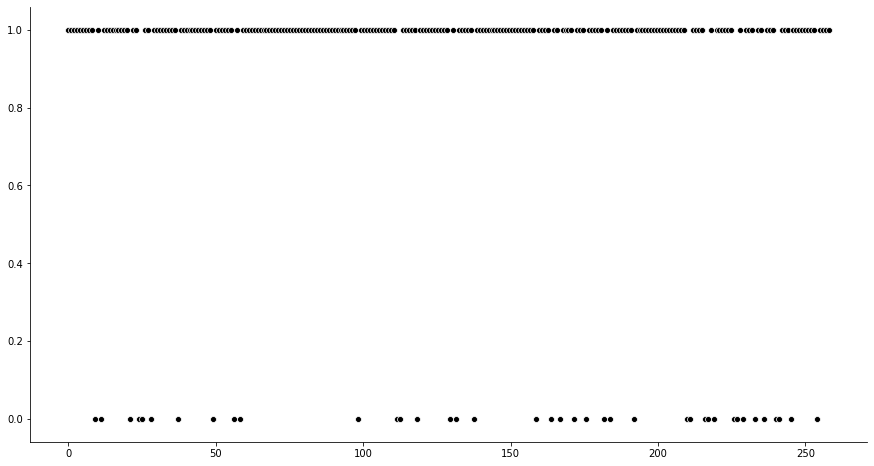

In [169]:
import numpy as np                         # Plotting the Predicted Output.
x = np.linspace(0,258,258)
plt.figure(figsize = (15,8))
sns.scatterplot(x, y_pred, color='k')
sns.despine()


In [79]:
# Developing Functions of the Window.
def vectorized_stride_v1(array, clearing_time_index, max_time, sub_window_size,
                         stride_size):
    start = clearing_time_index + 1 - sub_window_size + 1
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        np.expand_dims(np.arange(max_time + 1), 0).T
    )
    
    # Fancy indexing to select every V rows.
    return array[sub_windows[::stride_size]]


def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
                         stride_size):
    start = clearing_time_index + 1 - sub_window_size + 1
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        # Create a rightmost vector as [0, V, 2V, ...].
        np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
    )
    
    return array[sub_windows]

In [89]:
# Starting  to implement the Sliding Window over the Output.
z1 = vectorized_stride_v2(y_pred, 3, 254, 5,3)
z1

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1.],
       [0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1.

In [103]:
az = z1.shape
bz = az[0] -1
bz

84

In [127]:
m = np.zeros(85)
m

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [131]:
# The Final Step of Sliding Window implementation.
for i in range(0,bz,1):
    er = z1[i]
    ew = np.sum(er)
    
    if ew>2:
        m[i]=1
    else:
        m[i]=0
        
    print(m)

    

[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 

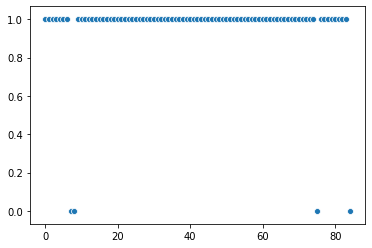

In [134]:
x = np.linspace(0,84,85)
sns.scatterplot(x, m)

In [157]:
m2 = np.zeros(258)
m2.shape

(258,)

In [158]:
# Changing the Sliding Parameters for optimizing the results.
for i in range(0,84,1):
    r1 = i*3
    r2 = r1+4
    for k in range(r1,r2,1):
        m2[k]=m[i]
        

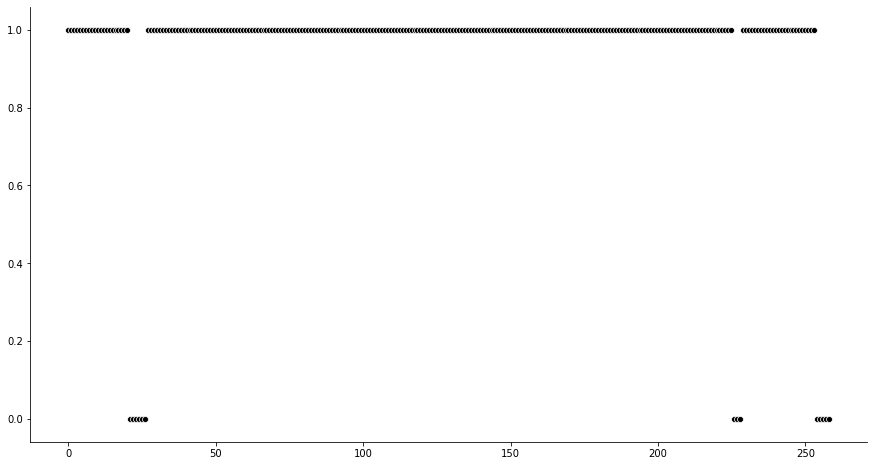

In [173]:
x = np.linspace(0,258,258)    
plt.figure(figsize = (15,8))
sns.scatterplot(x, m2,color='k')
sns.despine()

In [170]:
print("Accuracy:",metrics.accuracy_score(y_valid, m2))

Accuracy: 0.748062015503876


In [1]:
# Changing the Sliding Parameters for optimizing the results.
z2 = vectorized_stride_v2(y_pred, 1, 253, 5,1)
z2

NameError: name 'vectorized_stride_v2' is not defined

In [226]:
az2 = z2.shape
bz2 = az2[0] -1
m11 = np.zeros(bz2 +1)
m11.shape

(254,)

In [227]:
for i in range(0,bz2,1):
    er = z2[i]
    ew = np.sum(er)
    
    if ew>2:
        m11[i]=1
    else:
        m11[i]=0
        
    print(m11)

    

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [229]:
m3 = np.zeros(258)
m3.shape

(258,)

In [230]:
for i in range(0,254,1):
    r1 = i
    r2 = r1+3
    for k in range(r1,r2,1):
        m3[k]=m11[i]
   

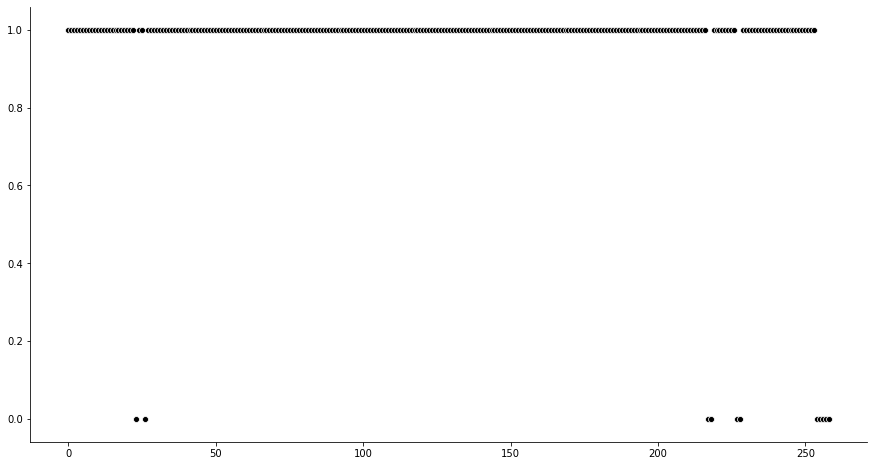

In [232]:
x = np.linspace(0,258,258)
plt.figure(figsize = (15,8))
sns.scatterplot(x, m3,color='k')
sns.despine()

In [233]:
print("Accuracy:",metrics.accuracy_score(y_valid, m3))

Accuracy: 0.7364341085271318
